In [ ]:
## Student ame: Dan Ni Lin
## Pattern Recognition Project 1

In [57]:
from matplotlib import style

# Use a predefined style (you can choose from styles like 'ggplot', 'seaborn', 'classic', etc.)
style.use('seaborn-darkgrid')  # Example style

/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/2085416425.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-darkgrid')  # Example style


## Statistical Analysis of Iris Flower Features

In [58]:
import pandas as pd
import numpy as np

file_path = '/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx'
df = pd.read_excel(file_path)

In [59]:
df.describe()

,meas_1,meas_2,meas_3,meas_4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
# Calculate variance of features
variance_values = df.var()
print("\nVariance Values:\n", variance_values)


Variance Values:
 meas_1    0.685694
meas_2    0.189979
meas_3    3.116278
meas_4    0.581006
dtype: float64


/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/4228551908.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_values = df.var()


In [61]:
# Calculate variance for each column for each species
variance_df = df.groupby('species').var()

print(variance_df)

              meas_1    meas_2    meas_3    meas_4
species                                           
setosa      0.124249  0.143690  0.030159  0.011106
versicolor  0.266433  0.098469  0.220816  0.039106
virginica   0.404343  0.104004  0.304588  0.075433


In [62]:
# Count the occurrences of each species
species_counts = df['species'].value_counts()

print(species_counts)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [63]:
# Within-Class Variance

sw_1 = (50/150)*0.124249 + (50/150)*0.266433 + (50/150)*0.404343
sw_2 = (50/150)*0.143690 + (50/150)*0.098469 + (50/150)*0.104004
sw_3 = (50/150)*0.030159 + (50/150)*0.220816 + (50/150)*0.304588
sw_4 = (50/150)*0.011106 + (50/150)*0.039106 + (50/150)*0.075433

print('Within-Class Variance')
print('Sepal Length: ', np.round(sw_1,2)) 
print('Sepal Width: ',np.round(sw_2,2)) 
print('Petal Length: ',np.round(sw_3,2))
print('Petal Width: ',np.round(sw_4,2))

Within-Class Variance
Sepal Length:  0.27
Sepal Width:  0.12
Petal Length:  0.19
Petal Width:  0.04


In [64]:
# Calculate variance for each column for each species
mean_df = df.groupby('species').mean()

print(mean_df)

            meas_1  meas_2  meas_3  meas_4
species                                   
setosa       5.006   3.428   1.462   0.246
versicolor   5.936   2.770   4.260   1.326
virginica    6.588   2.974   5.552   2.026


In [65]:
# Between-Class Variance

sb_1 = (50/150)*(5.006-5.84)**2 + (50/150)*(5.936-5.84)**2 + (50/150)*(6.588-5.84)**2
sb_2 = (50/150)*(3.428-3.06)**2 + (50/150)*(2.770-3.06)**2 + (50/150)*(2.974-3.06)**2
sb_3 = (50/150)*(1.462-3.76)**2 + (50/150)*(4.260-3.76)**2 + (50/150)*(5.552-3.76)**2
sb_4 = (50/150)*(0.246-1.20)**2 + (50/150)*(1.326-1.20)**2 + (50/150)*(2.026-1.20)**2

print('Between-Class Variance')
print('Sepal Length: ', np.round(sb_1,2)) 
print('Sepal Width: ',np.round(sb_2,2)) 
print('Petal Length: ',np.round(sb_3,2))
print('Petal Width: ',np.round(sb_4,2))

Between-Class Variance
Sepal Length:  0.42
Sepal Width:  0.08
Petal Length:  2.91
Petal Width:  0.54


## Compute the correlation coefficient 

/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/2000856596.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


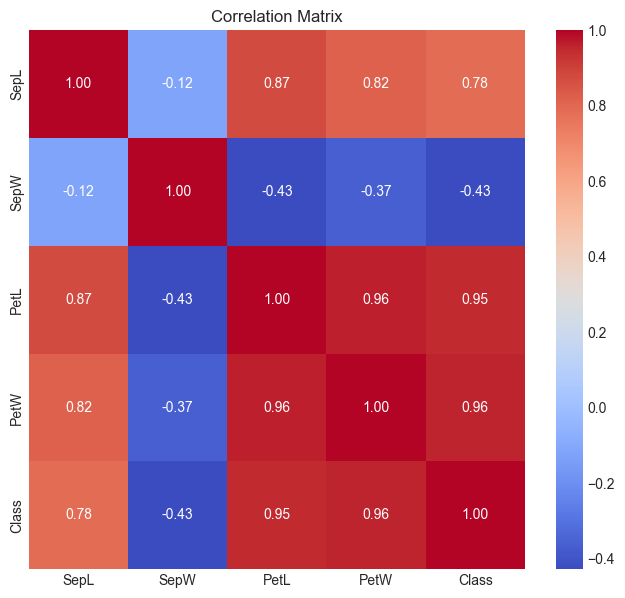

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

df['species_encoded'] = df['species'].astype('category').cat.codes

correlation_matrix = df.corr()

# Creating a mapping of old column names to new names for the plot
new_column_names = {
    'meas_1': 'SepL',
    'meas_2': 'SepW',
    'meas_3': 'PetL',
    'meas_4': 'PetW',
    'species_encoded': 'Class'  # or 'species_encoded' if you have encoded this column
}

# Rename columns and index in the correlation matrix for plotting
correlation_matrix = correlation_matrix.rename(columns=new_column_names, index=new_column_names)

# Plotting the correlation matrix
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Feature Vs. Class

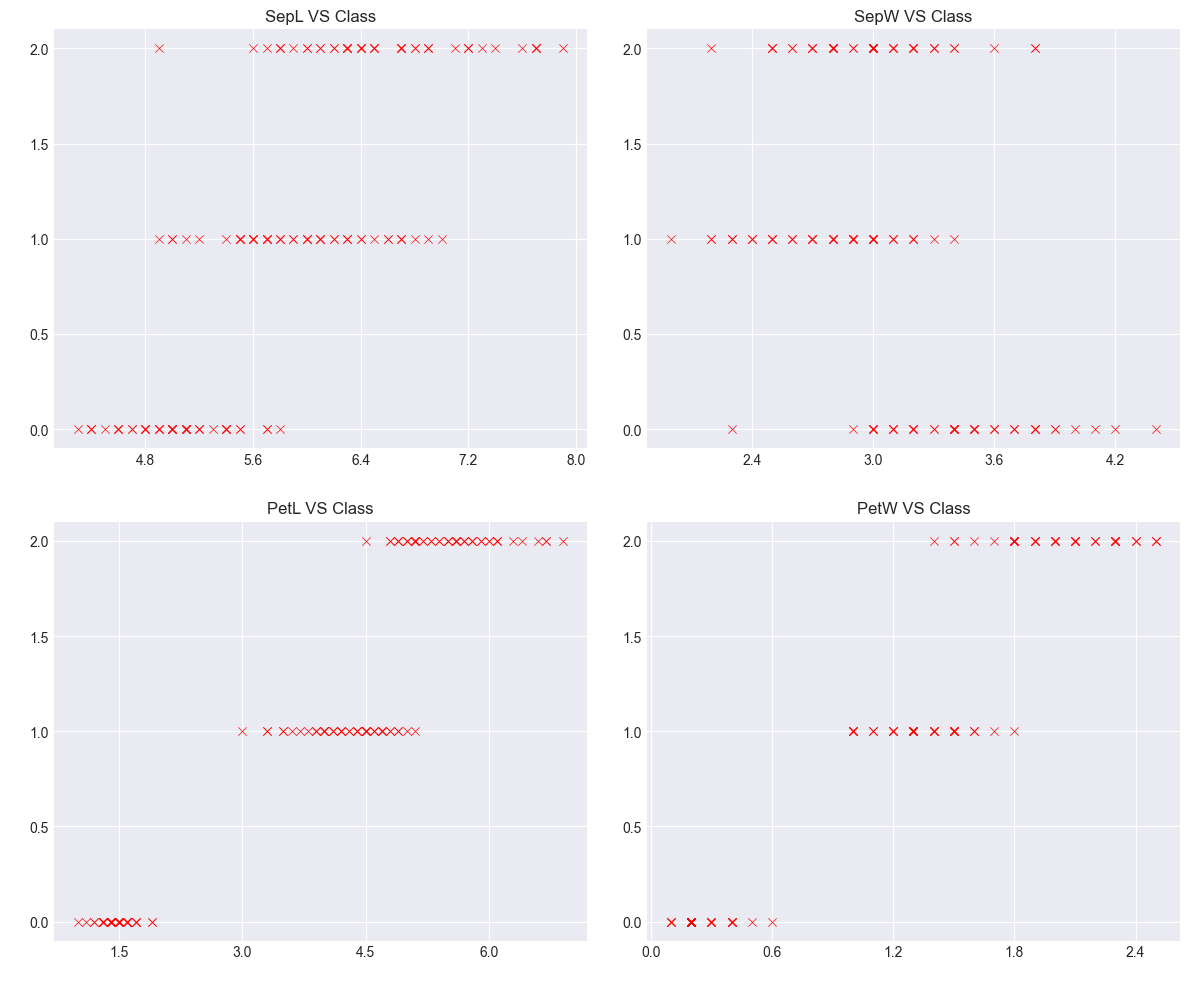

In [67]:
# Convert 'species' to integer codes
df['species_int'] = df['species'].astype('category').cat.codes

# List of measurements
measurements = ['meas_1', 'meas_2', 'meas_3', 'meas_4']

name = ['SepL', 'SepW', 'PetL', 'PetW']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iterating
axes = axes.flatten()

# Create a plot for each measurement
for i, measurement in enumerate(measurements):
    sns.scatterplot(x=df[measurement], y=df['species_int'], ax=axes[i], marker='x', color='red')
    axes[i].set_title(f'{name[i]} VS Class')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')

    axes[i].xaxis.set_major_locator(plt.MaxNLocator(5)) # Adjust as needed, e.g., 5 ticks
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(5)) # Adjust as needed, e.g., 3 ticks


# Adjust layout
plt.tight_layout()
plt.show()

## Perform classification - Batch Perceptron

In [68]:
def perceptron(file_path, learning_rate, epochs, variation, n_feature, name):

    #file_path = '/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx'
    df1 = pd.read_excel(file_path)

    if variation == 1:
        print('Variation 1')
        df1['species'] = df1['species'].replace(['versicolor', 'virginica'], 'versi-virginica')
        # Convert the 'species' column to categorical codes
        df1['species'] = df1['species'].astype('category').cat.codes
        # Assuming that the codes are 0 and 1, you can use a simple mapping
        df1['species'] = df1['species'].replace({0: -1, 1: 1})

    if variation == 2:
        print('Variation 2')
        df1['species'] = df1['species'].replace(['setosa', 'versicolor'], 'setosa-versicolor')
        # Convert the 'species' column to categorical codes
        df1['species'] = df1['species'].astype('category').cat.codes
        # Assuming that the codes are 0 and 1, you can use a simple mapping
        df1['species'] = df1['species'].replace({0: -1, 1: 1})

    # Create an array for the vectors (excluding the 'species' column)
    if n_feature == 1:
        print('1 feature')
        vectors_array = df1.iloc[:, :-1].to_numpy()

    if n_feature == 2:
        print('2 features')
        vectors_array = df1.iloc[:, 2:-1].to_numpy()

    # Create an array for the species classes
    species_array = df1['species'].to_numpy()

    # Pair each vector with its corresponding species class
    paired_data = list(zip(vectors_array, species_array))

    # Extract only the second element (species/class) from each tuple
    species = [species for _, species in paired_data]

    # Initialize the weights vector
    weights = np.zeros(vectors_array.shape[1])
    # Initialize the bias
    bias = 0
    # Combine weights and bias into a single vector
    w = np.append(weights, bias)
    x = np.hstack((vectors_array, np.ones((vectors_array.shape[0], 1))))

    # Set the learning rate and number of epochs
    #learning_rate = 0.01
    #epochs = 10

    # Create a list to store the number of misclassifications for each epoch
    misclassifications = []

    w_t = w.T

    for epoch in range(epochs):
        misclassified_sum = np.zeros_like(w)
        misclassified_count = 0

        # Calculate the predicted class
        predicted_class = np.dot(x, w_t)*species

        #print(predicted_class)

        # Iterate over each predicted class and actual species
        for i in range(len(predicted_class)):

            if predicted_class[i] >= 0:  # Misclassification condition
                misclassified_count += 1
                misclassified_sum += x[i]*species[i] # Update the sum based on the actual class

        # Update the weights after evaluating all examples
        if misclassified_count > 0:
            w -= learning_rate * misclassified_sum

        # Store the number of misclassifications for this epoch
        misclassifications.append(misclassified_count)

        print(f'Epoch {epoch+1}, Number of misclassifications: {misclassified_count}')

    plt.plot(range(1, epochs+1), misclassifications, marker='o', markersize=2)
    plt.xlabel('Epochs')
    plt.ylabel('Number of misclassifications')
    plt.title(name)
    plt.show()

    return x, w, species

In [69]:
def plot(data, w, spec, name):

    # Function to calculate the decision boundary
    def decision_boundary(sample):
        # Assuming the bias is the first element of w
        return -(w[2] + w[0] * sample) / w[1]

    # Generate a range of values for the first feature
    x_range = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)

    # Calculate corresponding values for the second feature using the decision boundary
    y_range = decision_boundary(x_range)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot data points
    plt.scatter(data[:, 0], data[:, 1], c=spec, cmap='viridis', edgecolor='k', s=20, label='Data points')
    # Plot decision boundary
    plt.plot(x_range, y_range, color='red', label='Decision Boundary')

    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.title(name)
    plt.legend()
    plt.show()

Variation 1
1 feature
Epoch 1, Number of misclassifications: 150
Epoch 2, Number of misclassifications: 50
Epoch 3, Number of misclassifications: 50
Epoch 4, Number of misclassifications: 42
Epoch 5, Number of misclassifications: 50
Epoch 6, Number of misclassifications: 3
Epoch 7, Number of misclassifications: 0
Epoch 8, Number of misclassifications: 0
Epoch 9, Number of misclassifications: 0
Epoch 10, Number of misclassifications: 0


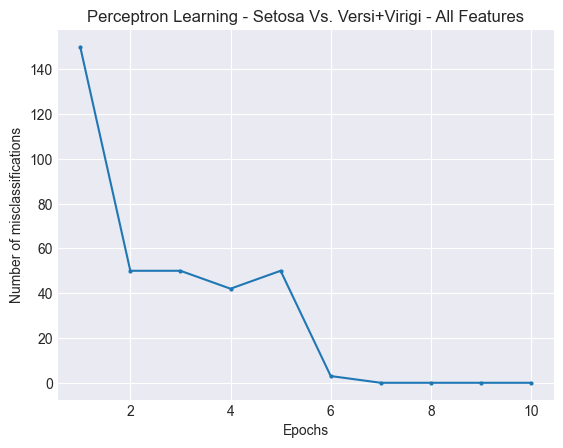

In [70]:
#1) Setosa Vs. Versi+Virigi - All Features - Batch_Perceptron

x1, w1, species1 = perceptron('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', learning_rate=0.01, epochs=10, variation=1, n_feature=1, 
                              name = "Perceptron Learning - Setosa Vs. Versi+Virigi - All Features")

In [71]:
#Feature Vector
x1

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

In [72]:
#Weights Vector
w1

array([ 1.101,  2.734, -3.837, -1.76 ,  0.55 ])

Variation 1
2 features
Epoch 1, Number of misclassifications: 150
Epoch 2, Number of misclassifications: 50
Epoch 3, Number of misclassifications: 50
Epoch 4, Number of misclassifications: 50
Epoch 5, Number of misclassifications: 50
Epoch 6, Number of misclassifications: 48
Epoch 7, Number of misclassifications: 0
Epoch 8, Number of misclassifications: 0
Epoch 9, Number of misclassifications: 0
Epoch 10, Number of misclassifications: 0


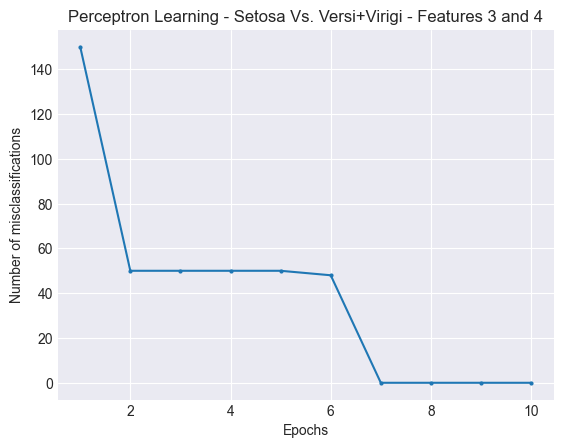

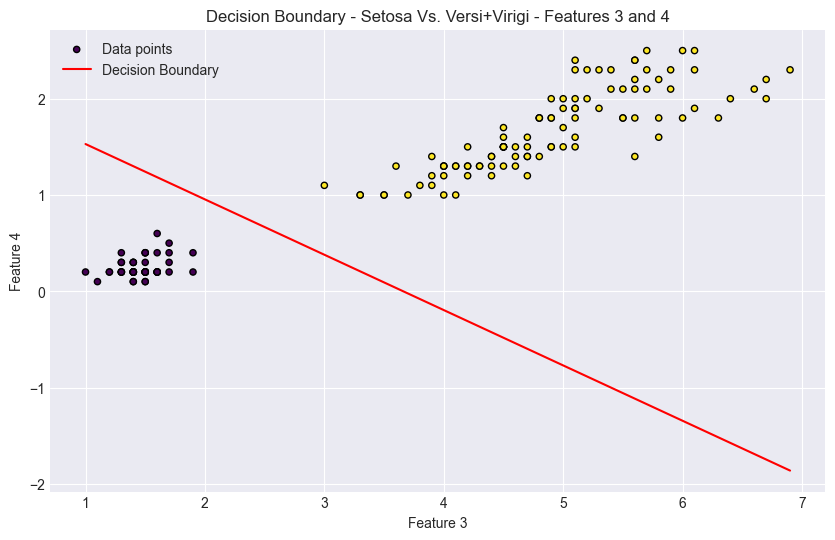

In [73]:
#2) Setosa Vs. Versi+Virigi - Features 3 and 4 - Batch_Perceptron
x2, w2, species2 = perceptron('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', learning_rate=0.01, epochs=10, variation=1, n_feature=2,
                              name = "Perceptron Learning - Setosa Vs. Versi+Virigi - Features 3 and 4")
plot(x2, w2, species2, name="Decision Boundary - Setosa Vs. Versi+Virigi - Features 3 and 4")

In [74]:
#Feature Vector
x2

array([[1.4, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.7, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [1.5, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.1, 0.1, 1. ],
       [1.2, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.3, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.7, 0.3, 1. ],
       [1.5, 0.3, 1. ],
       [1.7, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1. , 0.2, 1. ],
       [1.7, 0.5, 1. ],
       [1.9, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.4, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.5, 0.1, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.2, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.3, 0.3, 1. ],
       [1.3, 0.3

In [75]:
#Weights Vector
w2

array([-0.541, -0.941,  1.98 ])

Variation 2
1 feature
Epoch 1, Number of misclassifications: 150
Epoch 2, Number of misclassifications: 50
Epoch 3, Number of misclassifications: 100
Epoch 4, Number of misclassifications: 50
Epoch 5, Number of misclassifications: 47
Epoch 6, Number of misclassifications: 50
Epoch 7, Number of misclassifications: 50
Epoch 8, Number of misclassifications: 50
Epoch 9, Number of misclassifications: 70
Epoch 10, Number of misclassifications: 50
Epoch 11, Number of misclassifications: 50
Epoch 12, Number of misclassifications: 50
Epoch 13, Number of misclassifications: 51
Epoch 14, Number of misclassifications: 50
Epoch 15, Number of misclassifications: 83
Epoch 16, Number of misclassifications: 50
Epoch 17, Number of misclassifications: 50
Epoch 18, Number of misclassifications: 50
Epoch 19, Number of misclassifications: 50
Epoch 20, Number of misclassifications: 50
Epoch 21, Number of misclassifications: 50
Epoch 22, Number of misclassifications: 50
Epoch 23, Number of misclassifications:

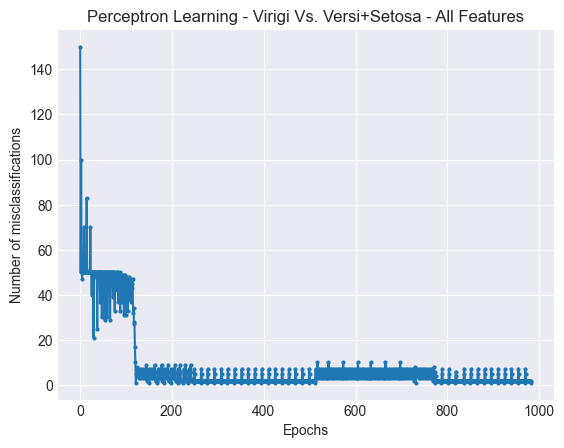

In [76]:
# 3) Virigi Vs. Versi+Setosa - All Features - Batch_Perceptron

## epochs = 982, learning_rate = 0.01 => mistakes = 1

x3, w3, species3 = perceptron('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', learning_rate=0.001, epochs=982, variation=2, n_feature=1,
                              name="Perceptron Learning - Virigi Vs. Versi+Setosa - All Features")

In [77]:
#Feature Vector
x3

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

In [78]:
#Weights Vector
w3

array([ 0.9822,  0.8522, -1.43  , -1.2169,  0.619 ])

Variation 2
2 features
Epoch 1, Number of misclassifications: 150
Epoch 2, Number of misclassifications: 50
Epoch 3, Number of misclassifications: 100
Epoch 4, Number of misclassifications: 50
Epoch 5, Number of misclassifications: 100
Epoch 6, Number of misclassifications: 50
Epoch 7, Number of misclassifications: 100
Epoch 8, Number of misclassifications: 50
Epoch 9, Number of misclassifications: 100
Epoch 10, Number of misclassifications: 50
Epoch 11, Number of misclassifications: 100
Epoch 12, Number of misclassifications: 50
Epoch 13, Number of misclassifications: 100
Epoch 14, Number of misclassifications: 50
Epoch 15, Number of misclassifications: 98
Epoch 16, Number of misclassifications: 50
Epoch 17, Number of misclassifications: 88
Epoch 18, Number of misclassifications: 50
Epoch 19, Number of misclassifications: 78
Epoch 20, Number of misclassifications: 50
Epoch 21, Number of misclassifications: 78
Epoch 22, Number of misclassifications: 37
Epoch 23, Number of misclassifica

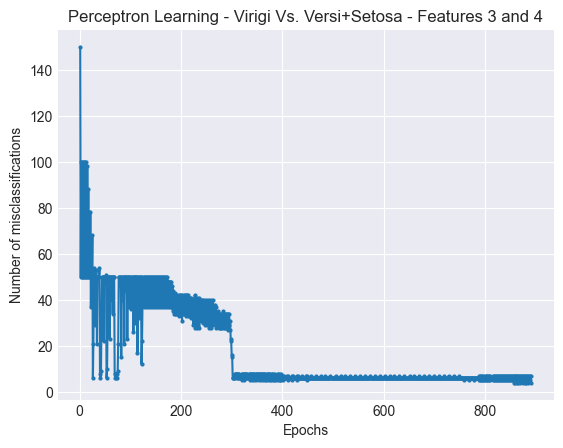

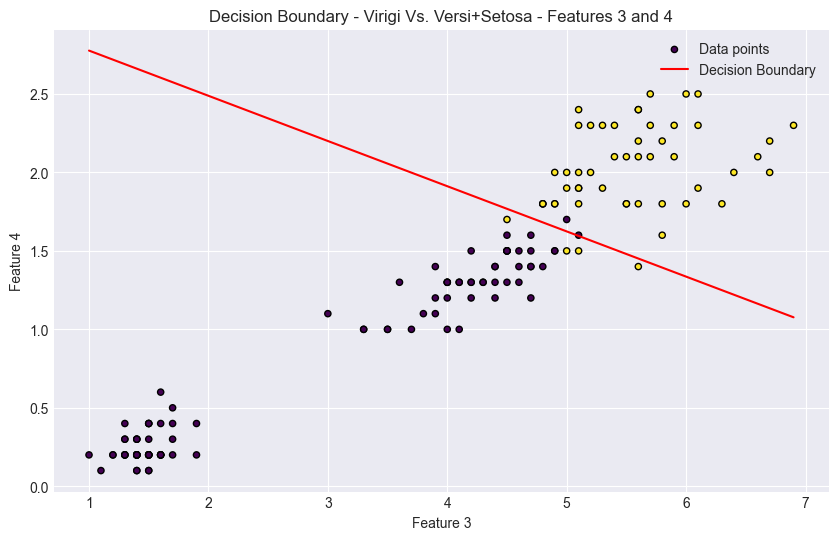

In [79]:
# 4) Virigi Vs. Versi+Setosa - Features 3 and 4 - Batch_Perceptron

## epochs = 891, learning_rate = 0.01 => mistakes = 4

x4, w4, species4 = perceptron('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', learning_rate=0.01, epochs=891, variation=2, n_feature=2,
                              name="Perceptron Learning - Virigi Vs. Versi+Setosa - Features 3 and 4")
plot(x4, w4, species4, name="Decision Boundary - Virigi Vs. Versi+Setosa - Features 3 and 4")

In [80]:
#Feature Vector
x4

array([[1.4, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.7, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [1.5, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.1, 0.1, 1. ],
       [1.2, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.3, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.7, 0.3, 1. ],
       [1.5, 0.3, 1. ],
       [1.7, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1. , 0.2, 1. ],
       [1.7, 0.5, 1. ],
       [1.9, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.4, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.5, 0.1, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.2, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.3, 0.3, 1. ],
       [1.3, 0.3

In [81]:
#Weights Vector
w4

array([-1.725, -5.988, 18.35 ])

## Perform classification - Least Square

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def closed_form(file_path, variation, n_feature):
    df1 = pd.read_excel(file_path)

    if variation == 1:
        print('Variation 1')
        df1['species'] = df1['species'].replace(['versicolor', 'virginica'], 'versi-virginica')
        df1['species'] = df1['species'].astype('category').cat.codes
        df1['species'] = df1['species'].replace({0: -1, 1: 1})

    elif variation == 2:
        print('Variation 2')
        df1['species'] = df1['species'].replace(['setosa', 'versicolor'], 'setosa-versicolor')
        df1['species'] = df1['species'].astype('category').cat.codes
        df1['species'] = df1['species'].replace({0: -1, 1: 1})

    scaler = MinMaxScaler()
    if n_feature == 1:
        print('1 feature')
        vectors_array = df1.iloc[:, :-1].to_numpy()
    elif n_feature == 2:
        print('2 features')
        vectors_array = df1.iloc[:, 2:-1].to_numpy()

    # Fit and transform the features
    vectors_array_normalized = scaler.fit_transform(vectors_array)

    # Create the augmented matrix for normalized features
    x_normalized = np.hstack((vectors_array_normalized, np.ones((vectors_array_normalized.shape[0], 1))))

    species_array = df1['species'].to_numpy()
    species = np.array(species_array)

    # Compute weights using normalized data
    pinv = np.linalg.pinv(np.dot(x_normalized.T, x_normalized))
    w = np.dot(pinv, np.dot(x_normalized.T, species))

    # Unnormalize weights
    feature_min = scaler.data_min_
    feature_range = scaler.data_max_ - scaler.data_min_
    w_unnormalized = w[:-1] / feature_range
    bias_unnormalized = w[-1] - np.sum(w_unnormalized * feature_min)
    w_unnormalized_full = np.append(w_unnormalized, bias_unnormalized)

    # Unnormalize the features
    vectors_array_unnormalized = scaler.inverse_transform(vectors_array_normalized)
    # Recreate the augmented matrix with unnormalized features and the bias column
    x_unnormalized = np.hstack((vectors_array_unnormalized, np.ones((vectors_array_unnormalized.shape[0], 1))))

    return x_unnormalized, w_unnormalized_full, species

In [83]:
def predict_classes_binary(X, W):
    """
    Predict class labels for samples in X for binary classification.

    Parameters:
    - X: numpy array, feature matrix with a bias term.
    - W: numpy array, weight vector including bias weight.

    Returns:
    - predictions: numpy array, predicted class labels.
    """
    # Compute the score for the class
    scores = np.dot(X, W)
    # Predict class 1 if score is positive, else class 0
    predictions = np.where(scores >= 0, 1, -1)  # Adjust class labels as needed
    return predictions


In [84]:
def plot_LS(data, w, spec, title):

    
    def decision_boundary(sample):
        
       return -(w[2] + w[0] * sample) / w[1]

    # Generate a range of values for the first feature
    x_range = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)

    # Calculate corresponding values for the second feature using the decision boundary
    y_range = decision_boundary(x_range)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot data points
    plt.scatter(data[:, 0], data[:, 1], c=spec, cmap='viridis', edgecolor='k', s=20, label='Data points')
    
    # Plot decision boundary
    plt.plot(x_range, y_range, color='red', label='Decision Boundary')

    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.title(title)
    plt.legend()
    plt.show()

In [85]:
# 1) Setosa Vs. Versi+Virigi - All Features - Least Square

xl1, wl1, sl1 = closed_form('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', variation=1, n_feature=1)

Variation 1
1 feature


In [86]:
# Weight Vector
wl1

array([-0.13205954, -0.48569574,  0.44931423,  0.11494546,  0.76355422])

In [87]:
# Feature Vector
xl1

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

In [88]:
from sklearn.metrics import accuracy_score


predicted_species = predict_classes_binary(xl1, wl1)

accuracy = accuracy_score(sl1, predicted_species)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Variation 1
2 features


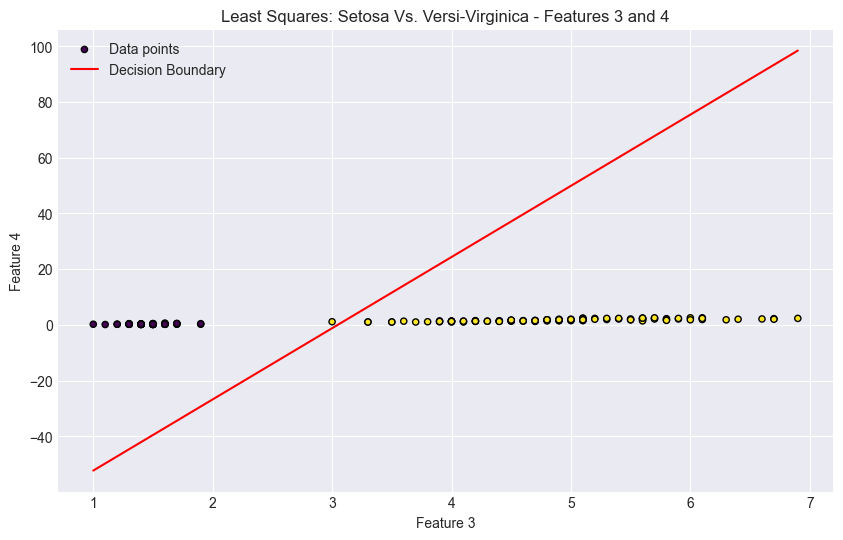

In [89]:
# 2) Setosa Vs. Versi+Virigi - 3 and 4 Features - Least Square

xl2, wl2, sl2 = closed_form('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', variation=1, n_feature=2)
plot_LS(xl2, wl2, sl2, 'Least Squares: Setosa Vs. Versi-Virginica - Features 3 and 4')

In [90]:
# Weight Vector
wl2

array([ 0.5026581 , -0.01966852, -1.53206671])

In [91]:
# Feature Vector
xl2

array([[1.4, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.7, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [1.5, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.1, 0.1, 1. ],
       [1.2, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.3, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.7, 0.3, 1. ],
       [1.5, 0.3, 1. ],
       [1.7, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1. , 0.2, 1. ],
       [1.7, 0.5, 1. ],
       [1.9, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.4, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.5, 0.1, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.2, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.3, 0.3, 1. ],
       [1.3, 0.3

In [92]:
predicted_species = predict_classes_binary(xl2, wl2)

accuracy = accuracy_score(sl2, predicted_species)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.33%


In [93]:
# 3) Virigi Vs. Versi+Setosa - All Features - Least Square

xl3, wl3, sl3 = closed_form('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', variation=2, n_feature=1)

Variation 2
1 feature


In [94]:
predicted_species = predict_classes_binary(xl3, wl3)

accuracy = accuracy_score(sl3, predicted_species)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.67%


In [95]:
# Weight Vector
wl3

array([-0.09175217,  0.40553677,  0.00797582,  1.10355865, -2.39056373])

In [96]:
# Feature Vector
xl3 

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

Variation 2
2 features


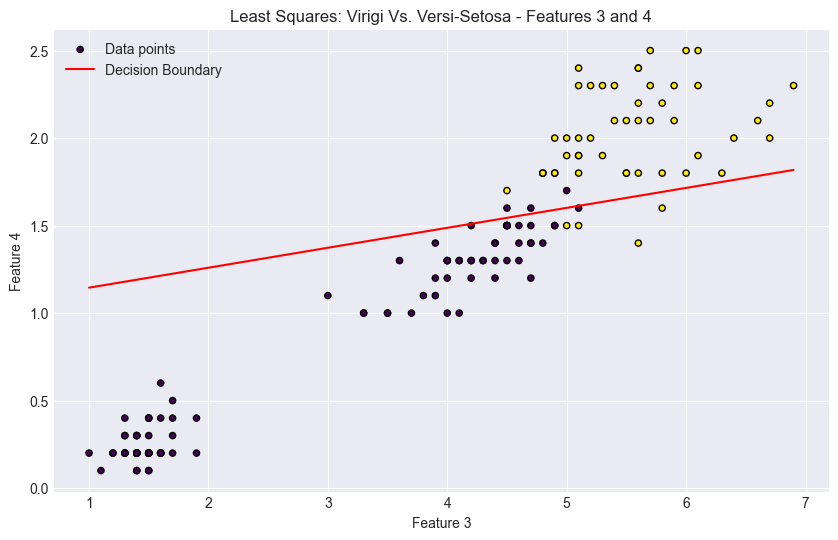

In [97]:
# 4) Virigi Vs. Versi+Setosa - 3 and 4 Features - Least Square

xl4, wl4, sl4 = closed_form('/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx', variation=2, n_feature=2)
plot_LS(xl4, wl4, sl4, 'Least Squares: Virigi Vs. Versi-Setosa - Features 3 and 4')

In [98]:
# Weight Vector
wl4

array([-0.14601222,  1.28051055, -1.32037839])

In [99]:
# Feature Vector
xl4

array([[1.4, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.7, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [1.5, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.1, 0.1, 1. ],
       [1.2, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.3, 0.4, 1. ],
       [1.4, 0.3, 1. ],
       [1.7, 0.3, 1. ],
       [1.5, 0.3, 1. ],
       [1.7, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1. , 0.2, 1. ],
       [1.7, 0.5, 1. ],
       [1.9, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.4, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [1.5, 0.1, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.2, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [1.4, 0.1, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.2, 1. ],
       [1.3, 0.3, 1. ],
       [1.3, 0.3

In [100]:
predicted_species = predict_classes_binary(xl4, wl4)

accuracy = accuracy_score(sl4, predicted_species)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.67%


## Least Square Vs. Perceptron

In [101]:
from matplotlib.lines import Line2D

def plot_decision_boundaries_S_VV(X, y, weights_perceptron, weights_least_squares, feature_indices=(0, 1)):
    plt.figure(figsize=(10, 6))
    
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Calculate decision boundaries
    Z_perceptron = (weights_perceptron[feature_indices[0]] * xx +
                    weights_perceptron[feature_indices[1]] * yy +
                    weights_perceptron[-1]) >= 0
    Z_least_squares = (weights_least_squares[feature_indices[0]] * xx +
                       weights_least_squares[feature_indices[1]] * yy +
                       weights_least_squares[-1]) >= 0
    
    # Plot decision boundaries
    plt.contour(xx, yy, Z_perceptron, levels=[0], colors='magenta', linestyles='--', linewidths=2)
    plt.contour(xx, yy, Z_least_squares, levels=[0], colors='limegreen', linestyles='-', linewidths=2)
    
    # Plot the dataset points with custom palette
    scatter = plt.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, cmap='viridis', edgecolor='w', s=50, alpha=0.7)
    
    # Custom legend for decision boundary lines and classes
    legend_elements = [Line2D([0], [0], color='magenta', linewidth=2, linestyle='--', label='Perceptron'),
                       Line2D([0], [0], color='limegreen', linewidth=2, linestyle='-', label='Least Squares'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='VersiVirigi'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Setosa')]
    
    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.title('Setosa-VersiVirigi: Perceptron vs. Least Squares')
    plt.legend(handles=legend_elements, loc='best')
    
    plt.show()

In [102]:
def plot_decision_boundaries_V_VS(X, y, weights_perceptron, weights_least_squares, feature_indices=(0, 1)):
    plt.figure(figsize=(10, 6))
    
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Calculate decision boundaries
    Z_perceptron = (weights_perceptron[feature_indices[0]] * xx +
                    weights_perceptron[feature_indices[1]] * yy +
                    weights_perceptron[-1]) >= 0
    Z_least_squares = (weights_least_squares[feature_indices[0]] * xx +
                       weights_least_squares[feature_indices[1]] * yy +
                       weights_least_squares[-1]) >= 0
    
    # Plot decision boundaries
    plt.contour(xx, yy, Z_perceptron, levels=[0], colors='magenta', linestyles='--', linewidths=2)
    plt.contour(xx, yy, Z_least_squares, levels=[0], colors='limegreen', linestyles='-', linewidths=2)
    
    # Plot the dataset points with custom palette
    scatter = plt.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y, cmap='viridis', edgecolor='w', s=50, alpha=0.7)
    
    # Custom legend for decision boundary lines and classes
    legend_elements = [Line2D([0], [0], color='magenta', linewidth=2, linestyle='--', label='Perceptron'),
                       Line2D([0], [0], color='limegreen', linewidth=2, linestyle='-', label='Least Squares'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Virigi'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='VersiSetosa')]
    
    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.title('Virigi-VersiSetosa: Perceptron vs. Least Squares')
    plt.legend(handles=legend_elements, loc='best')
    
    plt.show()

/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/638808914.py:17: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z_perceptron, levels=[0], colors='magenta', linestyles='--', linewidths=2)
/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/638808914.py:18: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z_least_squares, levels=[0], colors='limegreen', linestyles='-', linewidths=2)


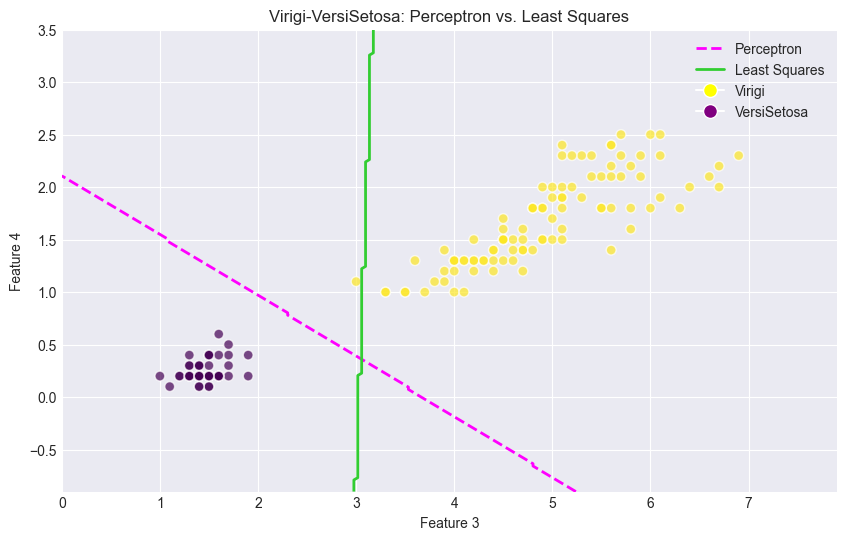

In [103]:
plot_decision_boundaries_V_VS(x2, species2, w2, wl2)

/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/2292438562.py:19: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z_perceptron, levels=[0], colors='magenta', linestyles='--', linewidths=2)
/var/folders/20/ybnfwpmd59s4m0gwcvjlxplr0000gn/T/ipykernel_51745/2292438562.py:20: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z_least_squares, levels=[0], colors='limegreen', linestyles='-', linewidths=2)


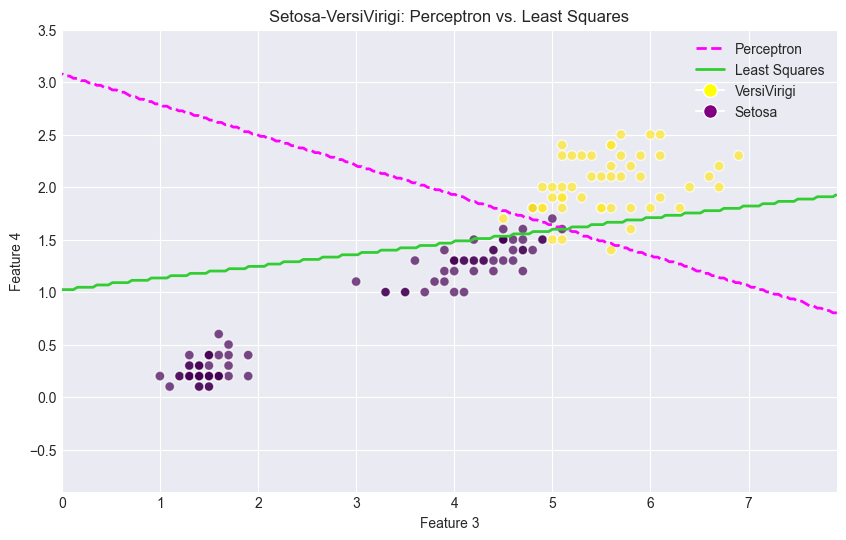

In [104]:
plot_decision_boundaries_S_VV(x4, species4, w4, wl4)

## Multiclass Classification

Unscaled Weight [[-0.25132905  0.32433516 -0.07300611]
 [ 0.00983426 -0.65008953  0.64025527]
 [ 1.26603335 -0.10584416 -0.16018919]]


<Figure size 1000x600 with 0 Axes>

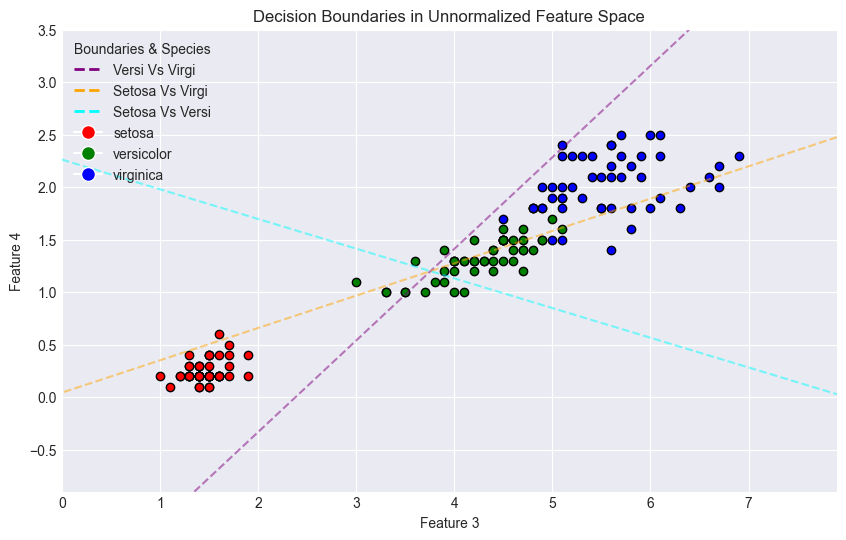

In [108]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def unscale_weights(W, scaler):
    
    # Extract feature ranges and minimum values from the scaler
    feature_ranges = scaler.data_max_ - scaler.data_min_
    feature_mins = scaler.data_min_
    
    # Unscale weights for the features
    W_unscaled = np.copy(W)
    W_unscaled[:-1, :] = W[:-1, :] / feature_ranges[:, np.newaxis]
    
    # Bias term
    for i in range(W.shape[1]):
        W_unscaled[-1, i] -= np.sum(W_unscaled[:-1, i] * feature_mins)
        
    return W_unscaled

def closed_form_multi_and_plot(file_path):
    # Load data
    df1 = pd.read_excel(file_path)

    # Select numeric columns for feature scaling
    numeric_features = df1.iloc[:, 2:-1]  # Adjust based on DataFrame structure

    # Scaling
    scaler = MinMaxScaler()
    vectors_array_scaled = scaler.fit_transform(numeric_features)

    # Convert the 'species' column to one-hot encoding
    Y = pd.get_dummies(df1['species']).to_numpy()

    # Adding bias term to the scaled feature array
    X_scaled = np.hstack((vectors_array_scaled, np.ones((vectors_array_scaled.shape[0], 1))))

    # Calculate weights using pseudo-inverse for the multi-class solution
    W_scaled = np.linalg.pinv(X_scaled.T @ X_scaled) @ X_scaled.T @ Y

    # Unscale weights
    W_unscaled = unscale_weights(W_scaled, scaler)

    print('Unscaled Weight', W_unscaled)

    # Unnormalize the features (excluding the bias term)
    X_unscaled = scaler.inverse_transform(vectors_array_scaled)

    #print('Unscaled Feature', X_unscaled)

    # Plotting
    x_min, x_max = X_unscaled[:, 0].min() - 1, X_unscaled[:, 0].max() + 1
    y_min, y_max = X_unscaled[:, 1].min() - 1, X_unscaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    plt.figure(figsize=(10, 6))

    # Create an array for the species classes
    species = df1['species'].to_numpy()

    legend_elements = []

    # Define species and their corresponding colors
    color_map = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

    # Define boundaries and their corresponding colors
    boundary_colors = {
        'Versi Vs Virgi': 'purple',
        'Setosa Vs Virgi': 'orange',
        'Setosa Vs Versi': 'cyan'
    }

    # Plot the decision boundaries
    plt.figure(figsize=(10, 6))
    for i, boundary_name in enumerate(boundary_colors.keys()):

        # Calculate the weight difference for the boundary
        w_diff = W_unscaled[:, i] - W_unscaled[:, (i + 1) % W_unscaled.shape[1]]
        Z = np.dot(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], w_diff)
        Z = Z.reshape(xx.shape)
        
        # Plot the contour for the boundary with the specified color
        boundary_color = boundary_colors[boundary_name]
        plt.contour(xx, yy, Z, levels=[0], colors=[boundary_color], alpha=0.5, linestyles='--')
        legend_elements.append(Line2D([0], [0], color=boundary_color, linewidth=2, linestyle='--', label=boundary_name))

    labels_map = {'setosa': 'red', 'versicolor': 'yellow', 'virginica': 'blue'}

    # Plot the data points with species colors and update legend elements correctly
    for species_name in np.unique(species):
        idx = np.where(species == species_name)[0]
        plt.scatter(X_unscaled[idx, 0], X_unscaled[idx, 1], color=color_map[species_name], label=species_name, edgecolor='k')
        legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[species_name], label=species_name, markersize=10))

    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.title('Decision Boundaries in Unnormalized Feature Space')
    plt.legend(handles=legend_elements, loc='best', title="Boundaries & Species")
    plt.show()

    return W_unscaled, X_unscaled

file_path = '/Users/dannilin/Desktop/PR/Project1/Proj1DataSet.xlsx'
W_unscaled, X_unscaled = closed_form_multi_and_plot(file_path)


In [109]:
def compute_accuracy(X, W, actual_labels):

    # Predict the class for each sample
    scores = np.dot(X, W)
    predictions = np.argmax(scores, axis=1)
    
    # take the maximum value of each row as the predicted class
    actual = np.argmax(actual_labels, axis=1)
    
    # Compute accuracy
    correct_predictions = np.sum(predictions == actual)
    accuracy = correct_predictions / len(actual)
    return accuracy

df1 = pd.read_excel(file_path)

actual_labels = pd.get_dummies(df1['species']).to_numpy()  

X_unscaled_with_bias = np.hstack((X_unscaled, np.ones((X_unscaled.shape[0], 1))))  
accuracy = compute_accuracy(X_unscaled_with_bias, W_unscaled, actual_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.33%
